In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
%matplotlib inline 

In [5]:
df = pd.read_csv("C:\\Users\\DeLL\\Downloads\\archive (3)\\TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [7]:
df.shape


(2956, 7)

In [8]:
df.drop('Adj Close',axis=1,inplace=True)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,34334500


In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Open    2956 non-null   float64
 2   High    2956 non-null   float64
 3   Low     2956 non-null   float64
 4   Close   2956 non-null   float64
 5   Volume  2956 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 138.7+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08


<Axes: >

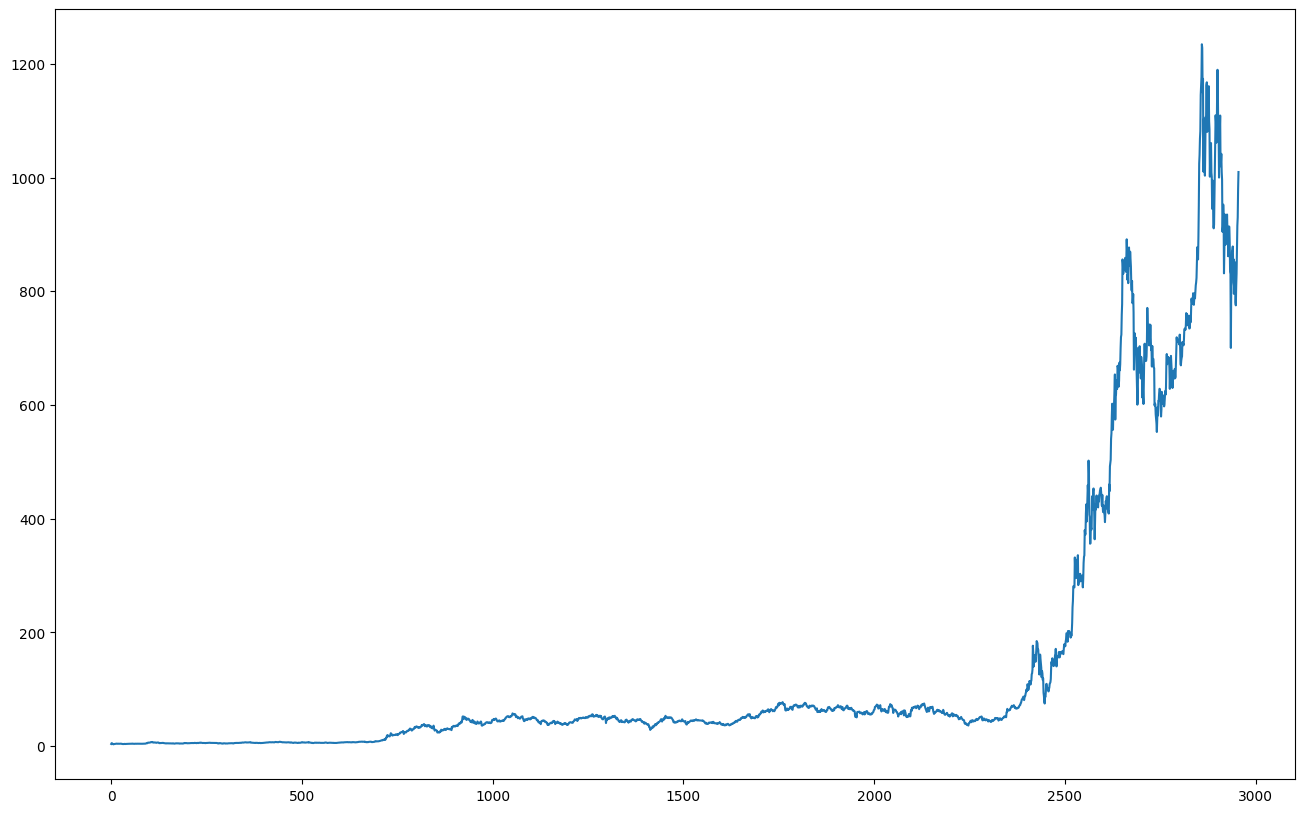

In [17]:
df['Open'].plot(figsize=(16,10))

In [18]:
X=df[['Open','High','Low','Volume']]
Y=df['Close']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [23]:
X_train.shape,X_test.shape

((2217, 4), (739, 4))

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
print(lr.coef_)

[-6.96214496e-01  9.34024620e-01  7.59984324e-01  6.49724985e-09]


In [29]:
print(lr.intercept_)

-0.14399536820258163


In [30]:
print(X_test)

            Open        High         Low    Volume
1749   74.884003   75.374001   70.959999  86307000
643     6.832000    6.970000    6.784000   7183500
118     5.734000    5.994000    5.706000   3714500
252     5.558000    5.650000    5.534000   4446000
1311   50.220001   50.849998   49.933998  14454500
...          ...         ...         ...       ...
794    31.400000   32.459999   31.000000  64659500
2429  167.800003  172.699997  164.440002  75961000
517     7.000000    7.042000    6.476000  12846500
1943   63.299999   64.150002   61.933998  37421500
1912   70.199997   71.931999   69.725998  20988500

[739 rows x 4 columns]


In [32]:
predicted=lr.predict(X_test)

In [33]:
predicted.shape

(739,)

In [34]:
dframe = pd.DataFrame(Y_test,predicted)

In [36]:
dfr = pd.DataFrame({'Actual Price: ': Y_test, 'Predicted Price:': predicted})

In [38]:
print(dfr)

      Actual Price:   Predicted Price:
1749       71.463997         72.611094
643         6.876000          6.812025
118         5.920000          5.823059
252         5.622000          5.498324
1311       50.638000         50.430232
...              ...               ...
794        32.368000         32.292931
2429      166.757996        169.802621
517         6.670000          6.565030
1943       62.712002         63.015313
1912       69.849998         71.295040

[739 rows x 2 columns]


In [39]:
dfr.head()

,Actual Price:,Predicted Price:
1749,71.463997,72.611094
643,6.876000,6.812025
118,5.920000,5.823059
252,5.622000,5.498324
1311,50.638000,50.430232


In [40]:
lr.score(X_test,Y_test)

0.9997322153411431

In [41]:
import math

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predicted))

Mean Absolute Error: 1.5128699035872692


In [44]:
print('Mean squared Error:', metrics.mean_squared_error(Y_test,predicted))

Mean squared Error: 17.806246538107036


In [45]:
gr = dfr.head(20)

<Axes: >

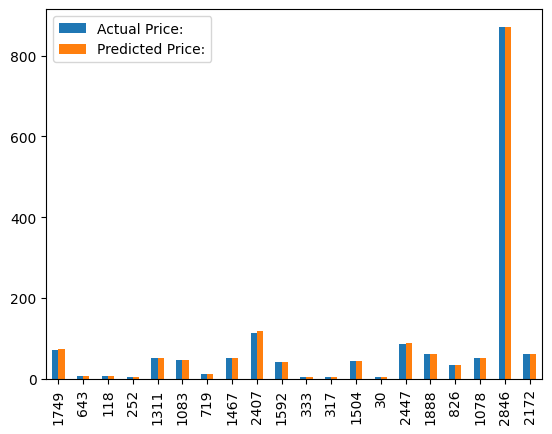

In [46]:
gr.plot(kind='bar')